# First Session

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
#defining constants and parameters
m = 0.2001
k = 18.19
t_i = 0
t_f = 10
delta_t = 0.01
omega_0 = math.sqrt(k/m)
y_i = 0.0215
v_i = 0

#preallocate an array
time_array = np.arange(((t_f-t_i)/delta_t) + 1) * delta_t
position_array = np.zeros(int((t_f-t_i)/delta_t) + 1)
velocity_array = np.zeros(int((t_f-t_i)/delta_t) + 1)

In [2]:
#collect data
#set initial position
position_array[0] = y_i
for i in range(1, len(position_array)):
    vi = velocity_array[i-1] - delta_t * omega_0**2 * position_array[i-1]
    yi = position_array[i-1] + delta_t * velocity_array[i-1]
    position_array[i] = yi
    velocity_array[i] = vi

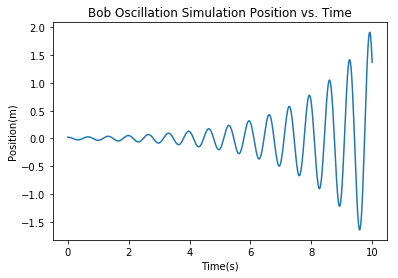

In [3]:
plt.plot(time_array, position_array)
plt.xlabel("Time(s)")
plt.ylabel("Position(m)")
plt.title("Bob Oscillation Simulation Position vs. Time")
plt.savefig("./forward_euler_position_time.pdf")

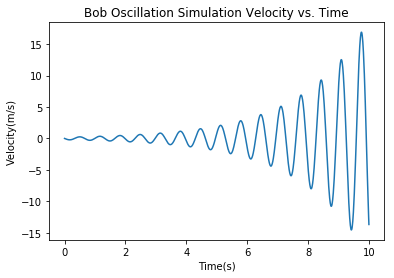

In [4]:
plt.plot(time_array, velocity_array)
plt.xlabel("Time(s)")
plt.ylabel("Velocity(m/s)")
plt.title("Bob Oscillation Simulation Velocity vs. Time")
plt.savefig("./forward_euler_velocity_time.pdf")

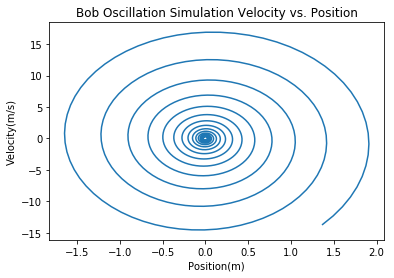

In [5]:
plt.plot(position_array, velocity_array)
plt.xlabel("Position(m)")
plt.ylabel("Velocity(m/s)")
plt.title("Bob Oscillation Simulation Velocity vs. Position")
plt.savefig("./forward_euler_velocity_position.pdf")

In [6]:
#Calculate energy at each time step
energy_array = np.zeros(int((t_f-t_i)/delta_t) + 1)
#Set energy at each step
for i in range(len(energy_array)):
    energy_array[i] = 0.5 * m * velocity_array[i]**2 + 0.5 * k * position_array[i]**2

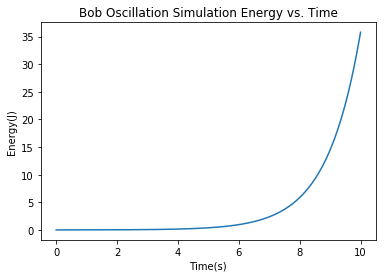

In [7]:
plt.plot(time_array, energy_array)
plt.xlabel("Time(s)")
plt.ylabel("Energy(J)")
plt.title("Bob Oscillation Simulation Energy vs. Time")
plt.savefig("./forward_euler_energy.pdf")

In [8]:
#Simulation with Symplectic Euler Method
symp_position_array = np.zeros(int((t_f-t_i)/delta_t) + 1)
symp_velocity_array = np.zeros(int((t_f-t_i)/delta_t) + 1)
symp_position_array[0] = y_i
for i in range(0, len(symp_position_array)):
    if i == 0:
        yi = y_i + delta_t * symp_velocity_array[i-1]
        symp_position_array[i] = yi
        vi = v_i - delta_t * omega_0**2 * symp_position_array[i]
        symp_velocity_array[i] = vi
    else:
        yi = symp_position_array[i-1] + delta_t * symp_velocity_array[i-1]
        symp_position_array[i] = yi
        vi = symp_velocity_array[i-1] - delta_t * omega_0**2 * symp_position_array[i]
        symp_velocity_array[i] = vi

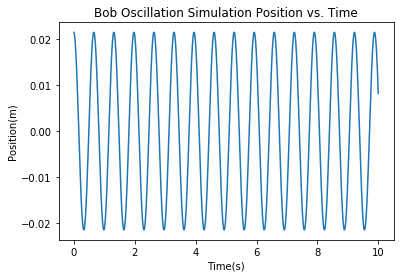

In [9]:
plt.plot(time_array, symp_position_array)
plt.xlabel("Time(s)")
plt.ylabel("Position(m)")
plt.title("Bob Oscillation Simulation Position vs. Time")
plt.savefig("./symplectic_position_time.pdf")

In [10]:
#Calculate energy at each time step
symp_energy_array = np.zeros(int((t_f-t_i)/delta_t) + 1)
#Set energy at each step
for i in range(len(symp_energy_array)):
    symp_energy_array[i] = 0.5 * m * symp_velocity_array[i]**2 + 0.5 * k * symp_position_array[i]**2

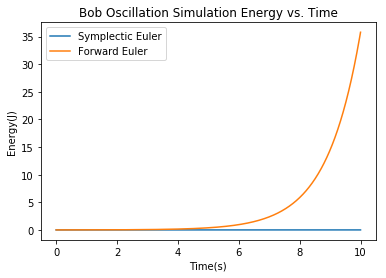

In [11]:
plt.plot(time_array, symp_energy_array, label="Symplectic Euler")
plt.plot(time_array, energy_array, label="Forward Euler")
plt.xlabel("Time(s)")
plt.ylabel("Energy(J)")
plt.title("Bob Oscillation Simulation Energy vs. Time")
plt.legend()
plt.savefig("./symplectic_energy_vs_forward_euler_energy.pdf")

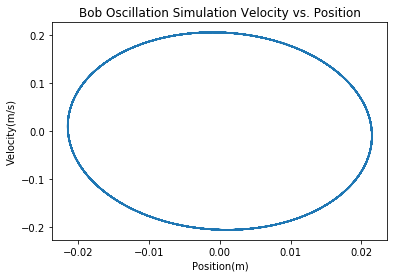

In [12]:
plt.plot(symp_position_array, symp_velocity_array)
plt.xlabel("Position(m)")
plt.ylabel("Velocity(m/s)")
plt.title("Bob Oscillation Simulation Velocity vs. Position")
plt.savefig("./symplectic_velocity_position.pdf")

# Second Session

In [13]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
#defining constants and parameters
m = 0.2177
k = 18.19
t_i = 0
t_f = 100
delta_t = 0.01
omega_0 = math.sqrt(k/m)
y_i = 0.0215
v_i = 0
gama = 0.0006

#preallocate an array
time_array2 = np.arange(((t_f-t_i)/delta_t) + 1) * delta_t
symp_position_array2 = np.zeros(int((t_f-t_i)/delta_t) + 1)
symp_velocity_array2 = np.zeros(int((t_f-t_i)/delta_t) + 1)

In [14]:
symp_position_array2[0] = y_i
for i in range(0, len(symp_position_array2)):
    if i == 0:
        yi = y_i + delta_t * symp_velocity_array2[i-1]
        symp_position_array2[i] = yi
        vi = v_i - delta_t * omega_0**2 * symp_position_array2[i] - gama * symp_velocity_array2[i-1]
        symp_velocity_array2[i] = vi
    else:
        yi = symp_position_array2[i-1] + delta_t * symp_velocity_array2[i-1]
        symp_position_array2[i] = yi
        vi = symp_velocity_array2[i-1] - delta_t * omega_0**2 * symp_position_array2[i] - gama * symp_velocity_array2[i-1]
        symp_velocity_array2[i] = vi

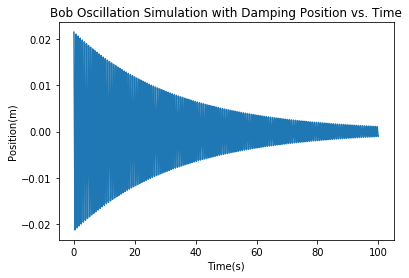

In [15]:
plt.plot(time_array2, symp_position_array2)
plt.title("Bob Oscillation Simulation with Damping Position vs. Time")
plt.xlabel("Time(s)")
plt.ylabel("Position(m)")
plt.savefig("./damped_position_time.pdf")

In [16]:
#Calculate energy at each time step
symp_energy_array2 = np.zeros(int((t_f-t_i)/delta_t) + 1)
#Set energy at each step
for i in range(len(symp_energy_array2)):
    symp_energy_array2[i] = 0.5 * m * symp_velocity_array2[i]**2 + 0.5 * k * symp_position_array2[i]**2

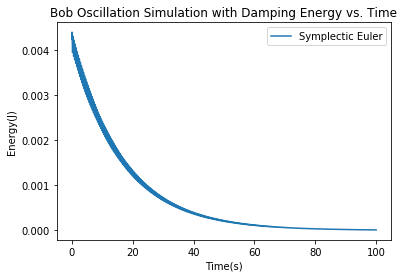

In [17]:
plt.plot(time_array2, symp_energy_array2, label="Symplectic Euler")
plt.xlabel("Time(s)")
plt.ylabel("Energy(J)")
plt.title("Bob Oscillation Simulation with Damping Energy vs. Time")
plt.legend()
plt.savefig("./damped_energy_time.pdf")